# Matematický software

## Cv. 8 - Metoda Monte Carlo

### 8.1 Úvod do metody

Metoda Monte Carlo byla poprvé použita v Manhattan projektu pro výzkum dynamiky řetězových reakcí vysoce obohaceného uranu. Světové špičky fyziky jako John von Neumann, Stanislaw Ulam a Nicholas Metropolis nedokázali tradiční cestou teoretické fyziky problémy řetězových reakcí vyřešit. Z toho důvodu navrhli výpočet pomocí metody Monte Carlo.

Dnes se metoda Monte Carlo používá v mnoha oblastech vědy a inženýrství pro různé typy aplikací. Příkladem může být finanční inženýrství (optimalizace portfolia akcií), výzkum nových léků (stochastické molekulární simulace), počítačová grafika ve videoherách (realistické osvětlení scény), počítačové fyziky (výpočet určitého integrálu) a v mnohých jiných oblastech.

Monte Carlo metodu lze stručně charakterizovat jako metodu, která opakuje experiment s náhodně zvolenými daty s velkým počtem opakování za účelem získání souhrnné statistiky z výsledků experimentu.

Postup:
1. Definice domény veličin (minimální, maximální hodnoty, omezení, atd.)
2. Generování náhodných veličin z pravděpodobnostního rozdělení, které jevu odpovídá (Gauss, rovnoměrné, troúuhelníkové, Poissonovo, atd.)
3. Provedení výpočtu nad náhodnými veličinami
4. Získání výsledku (souhrnné statistiky, histogramy, intervaly spolehlivosti)

#### Panna nebo orel?

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

Pravdepodobnost padnuti orla:  0.0


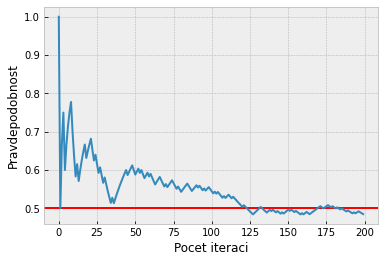

In [17]:
def hod_minci():
    return random.randint(0,1)

def monte_carlo(pocet_iteraci):
    okamzite_pravdepodobnosti = []
    soucet_hodnot = 0
    for ipokus in range(pocet_iteraci):
        vysledek_hodu = hod_minci()
        soucet_hodnot += vysledek_hodu
        okamzite_pravdepodobnosti.append(soucet_hodnot/(ipokus+1))
    plt.axhline(y=0.5, color="r", linestyle="-")
    plt.xlabel("Pocet iteraci")
    plt.ylabel("Pravdepodobnost")
    plt.plot(okamzite_pravdepodobnosti)
    return vysledek_hodu/pocet_iteraci

pravdepodobnost_orel = monte_carlo(200)
print("Pravdepodobnost padnuti orla: ", pravdepodobnost_orel)


#### Cvičení 1: Monty Hall problém

Představte si, že jste v televizní soutěži. Moderátor vám nabídne 3 dveře, které můžete otevřít. Jedny dveře ukrývají nový luxusní automobil a dvoje dvěře ukrývají kozu. Moderátor vás vyzve k výběru, vy si vyberete a otevřete (např.: dveře 1), ale nesmíte je otevřít. Moderátor následně otevře jedni ze dvou zbývajících dveří (např.: dveře 3) a odhalí za nimi kozu. Následně se moderátor zeptá, zda chcete změnit svůj výběr (dveře 1) na zbývající neotevřené dveře (dveře 2). Pokud chcete vyhrát automobil, bude větší šance ponechat si své dveře (dveře 1) nebo změnit volbu na zbývající dveře (dveře 2)?

Vaším úkolem je zjistit, zda je lepší změnit volbu dvěří. Důkaz proveďte pomocí metody Monte Carlo. Postup:
1. vytvořte seznam objektů za dveřmi, zamíchejte ho a proveďte náhodný výběr hráčem
2. moderátor odebere jednu kozu ze seznamu objektů za dvěřmi
3. hráč náhodně zvolí, zda změní volbu za zbývající objekt za dveřmi nebo si ponechá volbu
4. proveďte po zvolený počet iterací
5. nasčítejte, kolikrát by vyhrál změnou a kolikrát by vyhrál ponecháním
6. vhodně vizualizujte výsledky (například graf) nebo souhrnné číslo

**váš kód**

**řešení**

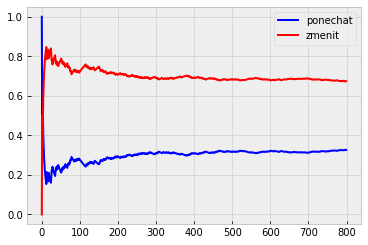

Sance na vyhru zmenou vyberu:  0.67375
Sance na vyhru ponechanim vyberu:  0.32625


In [99]:
from random import shuffle, choice

def monte_carlo_monty_hall(pocet_iteraci):
    pravdepodobnost_vyhry_ponechat = []
    pravdepodobnost_vyhry_zmenit = []
    pocet_vyher_zmena_dveri = 0
    pocet_vyher_ponechani_dveri = 0

    for iterace in range(pocet_iteraci):
        dvere = ["koza", "koza", "automobil"]
        shuffle(dvere)
        puvodni_volba_hrac = dvere.pop(dvere.index(choice(dvere)))
        #ve skutecnosti diky rozmichani shufflem neni nutne vybirat pomoci choice, stacil by pop
        #  ale timto zpusobem modelujeme spravne cely psychologicky proces v hlave hrace
        
        volba_moderator = dvere.pop(dvere.index("koza"))
        
        #lze to napsat do jednoho příkazu celé, ale pak to již nebude tak explicitní :)
        zmena_rozhodnuti = choice(["ano", "ne"])
        if zmena_rozhodnuti == "ano":
            if puvodni_volba_hrac == "koza":
                pocet_vyher_zmena_dveri += 1
            elif puvodni_volba_hrac == "automobil":
                pocet_vyher_ponechani_dveri += 1
        elif zmena_rozhodnuti == "ne":
            if puvodni_volba_hrac == "automobil":
                pocet_vyher_ponechani_dveri += 1
            elif puvodni_volba_hrac == "koza":
                pocet_vyher_zmena_dveri += 1
        
        pravdepodobnost_vyhry_zmenit.append(pocet_vyher_zmena_dveri/(iterace+1))
        pravdepodobnost_vyhry_ponechat.append(pocet_vyher_ponechani_dveri/(iterace+1))
    
    plt.plot(pravdepodobnost_vyhry_ponechat, "b", label="ponechat")
    plt.plot(pravdepodobnost_vyhry_zmenit, "r", label="zmenit")
    plt.legend()
    plt.show()
    print("Sance na vyhru zmenou vyberu: ", pravdepodobnost_vyhry_zmenit[-1])
    print("Sance na vyhru ponechanim vyberu: ", pravdepodobnost_vyhry_ponechat[-1])

monte_carlo_monty_hall(800)


### 8.2 Integrace metodou Monte Carlo

#### Výpočet hodnoty čísla PI

Pi =  3.1788


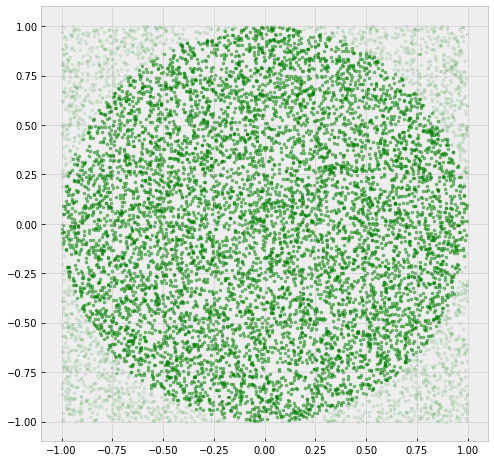

In [141]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats=["png"]

def aproximace_pi_monte_carlo(pocet_pokusu):
    zasahy = []
    minuti = []

    #generovani nahodne souradnice
    nahodne_x = np.random.uniform(-1, 1, pocet_pokusu)
    nahodne_y = np.random.uniform(-1, 1, pocet_pokusu)

    #pokud jsme se trefili do kruznice (detekce pythagorovou vetou), tak pricteme pocet zasahu
    zasahy = list(filter(lambda x: x[0]**2 + x[1]**2 <= 1, zip(nahodne_x, nahodne_y)))
    minuti = list(filter(lambda x: x[0]**2 + x[1]**2 > 1, zip(nahodne_x, nahodne_y)))

    plt.figure(figsize=(8,8))
    plt.scatter([x[0] for x in zasahy], [x[1] for x in zasahy], marker=".", color="green", alpha=0.5);
    plt.scatter([x[0] for x in minuti], [x[1] for x in minuti], marker=".", color="green", alpha=0.1);

    return 4 * len(zasahy)/float(pocet_pokusu)

print("Pi = ", aproximace_pi_monte_carlo(10000))

**Rychlost konvergence**

Chyba Monte Carlo metody by měla klesat proporčně k převrácené hodnotě odmocniny z počtu kroků.

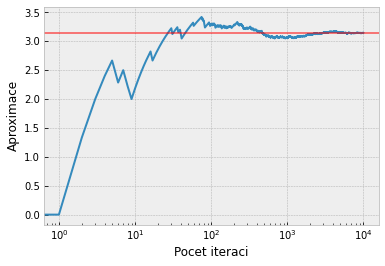

In [144]:
def aproximace_pi_monte_carlo(pocet_pokusu):
    zasahy = 0
    aproximace = np.empty(pocet_pokusu)
    
    for i in range(pocet_pokusu):
        nahodne_x = np.random.uniform(-1, 1)
        nahodne_y = np.random.uniform(-1, 1)
        zasahy += 1 if nahodne_x**2 + nahodne_y**2 <= 1 else 0
        aproximace[i] = 4 * zasahy/(i+1)

    plt.semilogx(aproximace)
    plt.xlabel("Pocet iteraci")
    plt.ylabel("Aproximace")
    plt.axhline(np.pi, color="r", alpha=0.5);

    return aproximace

aproximace = aproximace_pi_monte_carlo(10000)


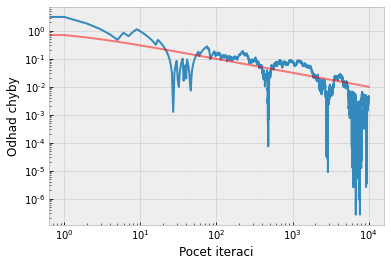

In [145]:
pocet_hodnot = len(aproximace)
plt.loglog(np.arange(pocet_hodnot), np.abs(aproximace-np.pi))
plt.loglog(1/np.sqrt(np.arange(pocet_hodnot)+1), color="r", alpha=0.5)
plt.xlabel("Pocet iteraci")
plt.ylabel("Odhad chyby");

#### Cvičení 2: Objem N-dimenzionální koule

Program z předchozího cvičení lze rychlou úpravou převést na výpočet N-dimenzionální krychle. Napište funkci, do které zadáte počet poloměr koule, počet dimenzí a počet iterací a program vrátí objem takové koule. Porovnejte výslednou aproximaci s teoretickým výsledkem.

**váš kód**

**řešení**

In [150]:
def objem_nkoule(polomer, pocet_dimenzi, pocet_iteraci):
    zasahy = 0
    nahodny_bod = [np.random.uniform(0, 2*polomer, pocet_dimenzi) for i in range(pocet_iteraci)]
    zasahy = np.sum(list(filter(lambda x: np.sum([xi**2 for xi in x]) <= polomer, nahodny_bod)))
    objem_nkrychle = 2*polomer*pocet_dimenzi
    return objem_nkrychle*zasahy/pocet_iteraci

print(objem_nkoule(1, 1, 100000))
print(objem_nkoule(1, 2, 100000))
print(objem_nkoule(1, 3, 100000))
print(objem_nkoule(1, 4, 100000))
print(objem_nkoule(1, 5, 100000))

0.5001814402018493
0.6722128204972225
0.4355120097232992
0.21143025932227114
0.08129866847358672


#### Výpočet určitého integrálu

Jelikož Metodou Monte Carlo lze spočítat obsah nebo objem nějaké oblasti, lze s ní spočítat i určitý integrál. Opakování předchozí metody tedy vede k myšlence:
1. vygeneruj náhodné souřadnice x a fx
2. zjisti, zda spadají do oblasti, kterou funkce vytyčuje svou funkční hodnotou nad/pod osou x
3. započti nebo nezapočti zásah
4. spočítej integrál jako obsah oblasti pomocí procenta zásahů a obsahu omezující oblasti

Omezující oblast spočítáme jako obdélník, který je šiřoký jako definiční obor a vysoký jako obor hodnot. Zde se počítá s tím, že celý definiční obor je spojitý a stejně tak obor hodnot. Tento přístup (tzv. rejection sampling metoda) bude však značně nepřesný a také počítá integrál v absolutní hodnotě.

In [21]:
def integral(a, b, f, pocet_vzorku):
    max_f = max(f(np.linspace(a, b, 100000)))
    min_f = min(f(np.linspace(a, b, 100000)))
    xs = np.random.uniform(a, b, pocet_vzorku)
    fxs = np.random.uniform(min_f, max_f, pocet_vzorku)
    fx_in_domain = [fx for x, fx in zip(xs, fxs) if fx <= f(x) and fx>0 or fx >= f(x) and fx<0]
    hits = len(fx_in_domain)
    return (b-a)*(max_f-min_f)*hits/pocet_vzorku

#int_0^2(2*x) = 0^2[x**2] = 4 - 0 = 4
print(integral(a=0, b=2, f=lambda x: 2*x, pocet_vzorku=10000))

#int_0^1(x**2) = 0^1[1/3 * x**3] = [1/3 1**3] - [1/3 * 0**3] = 1/3
print(integral(a=0, b=1, f=lambda x: x**2, pocet_vzorku=10000))

#int_-1^1(x**2) = -1^1[1/3 * x**3] = [1/3 1**3] - [1/3 *(-1)**3] = 2/3
print(integral(a=-1, b=1, f=lambda x: x**2, pocet_vzorku=10000))

#int_1^3(-3x**2+6) = 1^3[-x**3+6x] = [-3**3 + 6*3] - [-1**3 + 6*1] =  [-27 + 18] - [-1 + 6] = -9 -5 = -14
print(integral(a=1, b=3, f=lambda x: -3*x**2 + 6, pocet_vzorku=10000))

4.0704
0.344
0.6631999999336786
15.6288


#### Cvičení 3: Integrál

Lepší řešení je náhodně vzorkovat prostor (x,fx) a spočítat průměrnou navzorkovanou funkční hodnota. Integrál se pak spočítá jako plocha oblasti od A do B na ose x a 0 do stredni hodnoty z navzorkovanych hodnot na ose y.

<img src="MS8_soubory/integral.png" alt="Drawing" style="width: 600px;"/>

Vaším úkolem je naprogramovat výpočet integrálu touto metodou.

**váš kód**

**řešení**

In [24]:
def integral(a, b, f, n):
    xs = np.random.uniform(a, b, n)
    return (b-a)*np.mean(f(xs))

#int_0^2(2*x) = 0^2[x**2] = 4 - 0 = 4
print(integral(a=0, b=2, f=lambda x: 2*x, n=10000))

#int_0^1(x**2) = 0^1[1/3 * x**3] = [1/3 1**3] - [1/3 * 0**3] = 1/3
print(integral(a=0, b=1, f=lambda x: x**2, n=10000))

#int_-1^1(x**2) = -1^1[1/3 * x**3] = [1/3 1**3] - [1/3 *(-1)**3] = 2/3
print(integral(a=-1, b=1, f=lambda x: x**2, n=10000))

#int_1^3(-3x**2+6) = 1^3[-x**3+6x] = [-3**3 + 6*3] - [-1**3 + 6*1] =  [-27 + 18] - [-1 + 6] = -9 -5 = -14
print(integral(a=1, b=3, f=lambda x: -3*x**2 + 6, n=10000))

3.989315314048846
0.3290219516909983
0.6708425480165935
-13.651029726383417


#### Statistické rozdělení

Monte Carlo lze využít i pro vytvoření libovolného statistického rozdělení pomocí rejection samplig metody.

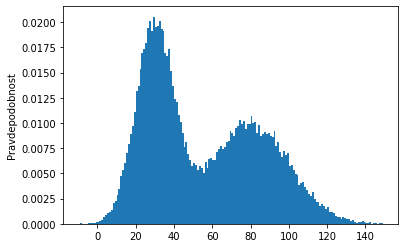

In [46]:
import numpy as np
from scipy.stats import norm

#P* = N(mu1, sigma1) + N(mu2, sigma2), součet normálních rozdělení
def P_star(x, mu_norm1, sigma_norm1, mu_norm2, sigma_norm2):
    p_x = norm.pdf(x, mu_norm1, sigma_norm1) + norm.pdf(x, mu_norm2, sigma_norm2)
    return(p_x)

#Q = proposal function, normální rozdělení z rozdílu středních hodnot a součtu rozptylů
def Q(x, mu_q, sigma_q):
    q_x = norm.pdf(x,mu_q,sigma_q)
    return(q_x)

#vygenerujeme souradnice x, u a zamitneme ty u, ktere nespadaji svou funkční hodnotou do P* rozdělení
def rejection_sampling(M, c, mu_q, sigma_q, mu_norm1, sigma_norm1, mu_norm2, sigma_norm2):
    x = np.random.normal(mu_q, sigma_q, size=M)
    u = np.random.uniform(0,c * Q(x, mu_q, sigma_q), size=M)
    return np.array(list(filter(
        lambda u: u[0] <= P_star(u[1], mu_norm1, sigma_norm1, mu_norm2, sigma_norm2), zip(u, x))))[:,1]

def main():

    #doména hodnot, na kterých chceme vzorkovat z rozdělení
    x = np.arange(-10,150)

    #střední hodnota a rozptyl dvou normálních rozdělení
    mu_norm1 = 30        #N(30, 10)
    sigma_norm1 = 10     
    mu_norm2 = 80       #N(80, 20)
    sigma_norm2 = 20

    #proposal function Q(x) = N(80-30, 20+10) = N(50, 30)
    #pomocí ní se provádí generování ze součtu rozdělení P* = N(30, 10) + N(80, 20)
    mu_q = 50
    sigma_q = 30

    #k rozdělení se vytváří normalizační konstanta
    c = max(P_star(x, mu_norm1, sigma_norm1, mu_norm2, sigma_norm2) / Q(x, mu_q, sigma_q))

    #pomocí rejection samplingu vrátíme přijaté hodnoty, spadající do rozdělení
    x_accepted = rejection_sampling(100000, c, mu_q, sigma_q, mu_norm1, sigma_norm1, mu_norm2, sigma_norm2)

    #vytvoříme histogram z nezamítnutých hodnot
    counts, bins, ignored = plt.hist(x_accepted, x, density = True)
    plt.ylabel("Pravdepodobnost")
    plt.show()

if __name__ == "__main__":
    main()

### 8.3 Aplikace metody Monte Carlo

#### Optimalizace portfolia akcií

Jedna ze zajímavých aplikací metody Monte Carlo je optimalizace finančního portfolia. Představme si situaci, kdy máme nějaké peníze ze stipendia navíc a chceme investovat do akcií. Rozhodujeme se rozložit finance do vybraných akcií, ale nevíme, kolik procent z uspořené částky do jaké akcie investovat. Na základě analýzy časového vývinu historických dat o akcii můžeme spočítat určité příznaky, které nám něco řeknou o volatilitě (rozptylu) ceny akcie a riziku, které z investice plyne. 

Metoda Monte Carlo se využívá tak, že vygenerujeme náhodne rozložení portfolia a následně zkoumáme, které z mnoha pokusů o rozložení dopadly nejlepé z pohledu očekávané návratnosti a míře očekávaného rizika. O tom vypovída tzv. Sharpeho poměr.

In [ ]:
!python3 -m pip install pandas_datareader

In [5]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import numpy as np
 
#vybereme akcie (Apple, Microsoft, Twitter, IBM) pro stažení
akcie = ['AAPL', 'MSFT', 'TWTR', 'IBM']

#vybereme počáteční datum pro stažení dat o hodnotách akcií
start_datum = dt.datetime(2020, 1, 1)

#stáhneme data o akciích pomocí pandas_datareaderu
data = pdr.get_data_yahoo(akcie, start_datum)

#Open = prvotní cena, za kterou se akcie prodávala v daný časový interval
#Close = poslední cena, za kterou se akcie prodávala v daný časový interval
#Low = nejnižší cena, za kterou se akcie prodávala v daný časový interval
#High = nejvyšší cena, za kterou se akcie prodávala v daný časový interval
#Volume = počet akcií, které byly směněny za daný časový interval
#Adj Close = upravená uzavírací cena pro přesnější výpočty návratnosti (po distribuci dividend na akcii atd.)
data.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'MSFT'),
            ('Adj Close', 'TWTR'),
            ('Adj Close',  'IBM'),
            (    'Close', 'AAPL'),
            (    'Close', 'MSFT'),
            (    'Close', 'TWTR'),
            (    'Close',  'IBM'),
            (     'High', 'AAPL'),
            (     'High', 'MSFT'),
            (     'High', 'TWTR'),
            (     'High',  'IBM'),
            (      'Low', 'AAPL'),
            (      'Low', 'MSFT'),
            (      'Low', 'TWTR'),
            (      'Low',  'IBM'),
            (     'Open', 'AAPL'),
            (     'Open', 'MSFT'),
            (     'Open', 'TWTR'),
            (     'Open',  'IBM'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'MSFT'),
            (   'Volume', 'TWTR'),
            (   'Volume',  'IBM')],
           names=['Attributes', 'Symbols'])

In [6]:
#nás zajímá upravená uzavírací cena
data = data['Adj Close']
data

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2020-01-02,73.785912,157.289886,32.299999,115.726624
2020-01-03,73.068565,155.331314,31.520000,114.803680
2020-01-06,73.650780,155.732864,31.639999,114.598579
2020-01-07,73.304413,154.312912,32.540001,114.675484
2020-01-08,74.483604,156.770889,33.049999,115.632607
...,...,...,...,...
2022-05-03,159.246017,281.779999,48.869999,132.520004
2022-05-04,165.776428,289.980011,49.060001,137.399994
2022-05-05,156.540009,277.350006,50.360001,135.919998


In [7]:
#data.shift posune data směrem dolu v tabulce(bez argumentu o jeden řádek) 
#spočítáme podílem návratnost investice v logaritmické škále
log_navratnosti = np.log(data/data.shift())
log_navratnosti

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.009770,-0.012530,-0.024445,-0.008007
2020-01-06,0.007936,0.002582,0.003800,-0.001788
2020-01-07,-0.004714,-0.009160,0.028048,0.000671
2020-01-08,0.015958,0.015803,0.015551,0.008312
...,...,...,...,...
2022-05-03,0.009577,-0.009501,-0.005510,-0.003916
2022-05-04,0.040190,0.028685,0.003880,0.036163
2022-05-05,-0.057328,-0.044532,0.026153,-0.010830


In [8]:
# Monte Carlo Simulation
pocet_experimentu = 5000
 
vahy_portfolia = np.zeros((pocet_experimentu, 4))   #poměry rozložení financní k nákupu akcií
ocekavana_navratnost = np.zeros(pocet_experimentu)  #průměrná hodnota návratnosti z nákupuju->prodeje akcie
ocekavana_volatilita = np.zeros(pocet_experimentu)  #vypovídá o rozsahu hodnot akcie (různé vzorce)
sharpeho_pomer = np.zeros(pocet_experimentu)        #návratnost v poměru k riziku
 
for i in range(pocet_experimentu):

    #přidělíme akciím váhy, které budeme optimalizovat
    weight = np.random.random(len(akcie))

    #podělení sumou zajišťuje celkový součet = 1 (suma penět plně alokována mezi akcie)
    weight /= weight.sum()
    vahy_portfolia[i] = weight
     
    #příznaky se násobí 252 a to ze složitého důvodu, který vyjde finančního vzorce
    #https://augmentedtrader.com/2015/09/02/why-multiply-by-sqrt252-to-compute-the-sharpe-ratio/
    ocekavana_navratnost[i] = np.sum(log_navratnosti.mean()*weight)*252
    ocekavana_volatilita[i] = np.sqrt(np.dot(weight.T, np.dot(log_navratnosti.cov()*252, weight)))
    sharpeho_pomer[i] = ocekavana_navratnost[i] / ocekavana_volatilita[i]

#optimalni rozvržení portfolia akcií
optimalni_vahy = vahy_portfolia[sharpeho_pomer.argmax()]*100
for znacka_akcie, alokace in zip(akcie, optimalni_vahy):
    print(f"Akcie: {znacka_akcie}, Alokovat financi: {alokace} %")

Akcie: AAPL, Alokovat financi: 89.71300344858555 %
Akcie: MSFT, Alokovat financi: 1.2407930755061736 %
Akcie: TWTR, Alokovat financi: 4.660295874088162 %
Akcie: IBM, Alokovat financi: 4.385907601820113 %


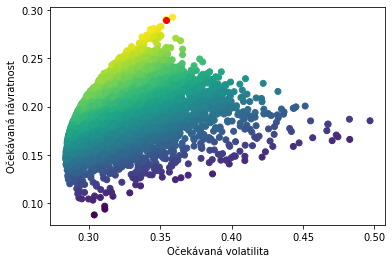

In [11]:
import matplotlib.pyplot as plt

volatilita_optima = ocekavana_volatilita[sharpeho_pomer.argmax()]
navratnost_optima = ocekavana_navratnost[sharpeho_pomer.argmax()]
plt.scatter(ocekavana_volatilita, ocekavana_navratnost, c=sharpeho_pomer)
plt.scatter(volatilita_optima, navratnost_optima, c='r')
plt.xlabel('Očekávaná volatilita')
plt.ylabel('Očekávaná návratnost')
plt.show()

#### Isingův model magnetismu

Isingův model představuje matematický model feromagnetismu ze statistické fyziky. Model se skládá z magnetických dipólů (spinů), které mohou být ve dvou hodnotách (up=1, down=-1). Spiny se nacházejí ve mřížce a mohou interagovat se svými sousedy. Pokud je natočení dvou párů spinů stejné, pak mají nižší energii než při opačném natočení. Systém se snaží dostat samovolně do stavu s minimální energií, ale tento přechod je narušován teplem, což umožňuje sledovat v modelu fázové přechody.

Isingův model je obtížné vyřešit analytickým způsobem (jak bude vypadat výsledné natočení spinů v daném čase), proto se řeší numerickým řešením například pomocí metody Monte Carlo. Konkrétně se využívá verze Monte Carlo algoritmu, které se jmenuje Metropolisův-Hastingsův algoritmus.

https://sites.physics.wustl.edu/gradcomputer/wiki/images/6/63/Ising_notes_v2.pdf

Tento algoritmus je využíván v mnoha oblastech sociální fyziky pro modelování šíření volebního chování nebo segregace menšin.

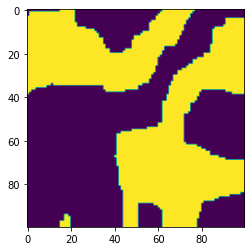

In [26]:
import numpy as np
from numpy.random import choice, randint, random
import matplotlib.pyplot as plt

def pocatecni_stav(vyska, sirka):
    return np.matrix([[choice([-1, 1]) for j in range(sirka)] for i in range(vyska)])

def zobraz_spiny(matice):
    return plt.imshow(matice)

def vyber_nahodny_spin(matice):
    return (randint(0, matice.shape[0]), randint(0, matice.shape[1]))

def otoc_spin(matice, spin):
    matice[spin[0], spin[1]] *= -1

def energie_interakce(matice, i, j):
    okolni_spiny = [matice[min(i+k, len(matice)-1), min(j+l, len(matice)-1)] 
                    for k in range(-1, 2) for l in range(-1, 2) 
                    if abs(k + l) == 1]
    return matice[i,j]*sum(okolni_spiny)

def hamiltonian(matice, J=1):
    return J*sum([energie_interakce(matice, i, j) for i in range(len(matice)) for j in range(len(matice))])

def metropolis(matice, beta, i, j):
    energie_pred_zmenou = energie_interakce(matice, i, j)
    otoc_spin(matice, (i, j))
    energie_po_zmene = energie_interakce(matice, i, j)
    zmena_energie = -(energie_po_zmene - energie_pred_zmenou)
    if zmena_energie > 0 and random() > np.exp(-beta*(zmena_energie)):
        otoc_spin(matice, (i, j))
    return zmena_energie

def monte_carlo(matice, pocet_iteraci, teplota, energie, J=1):
    for iterace in range(pocet_iteraci):
        nahodny_spin = vyber_nahodny_spin(matice)
        energie.append(energie[-1] + metropolis(matice, beta=1.0/teplota, i=nahodny_spin[0], j=nahodny_spin[1]))

def main():
    ising = pocatecni_stav(vyska=100, sirka=100)
    energie = [hamiltonian(ising)]
    #monte_carlo(matice=ising, pocet_iteraci=10, teplota=1, energie=energie)
    #monte_carlo(matice=ising, pocet_iteraci=10000, teplota=1, energie=energie)
    #monte_carlo(matice=ising, pocet_iteraci=100000, teplota=1, energie=energie)
    monte_carlo(matice=ising, pocet_iteraci=1000000, teplota=0.1, energie=energie)
    zobraz_spiny(ising)
    

if __name__ == "__main__":
    main()

#### Cvičení 4: Simulace ideálního plynu

Obdobným způsobem můžete simulovat jiné systémy, ve kterých stav přijímáte za určitých okolností vždy a za určitých s nějakou pravděpodobností, která se mění na základě vybraného parametru (například teplota). Jedná se zejména o simulace z oblasti fyzikálního modelování, avšak lze je využít i v ekonofyzice, sociofyzice i jiných oblastech. Jedním z důležitých modelů je model ideálního plynu. Tento model má v realističtějším přiblížení mezičásticový potenciál, který se modeluje Lennard-Jonesovo vzorcem.

<img src="MS8_soubory/LJ.png" alt="Drawing" style="width: 600px;"/>

Vaším úkolem je naprogramovat simulaci vývoje polohy ideálního plynu. Postup je následující:
1. Vygeneruj náhodně částice ve 2D simulačním čtverci
2. Pohni s náhodně vybranou částicí
3. Pokud se energie po posunu zmenšila, tak tam částici ponech
4. Pokud se zhoršila, tak losuj Metropolisovým algoritmem pravděpodobnost, která je podmíněna teplotou
5. Pokračuj do konce iteračního cyklu

Pro ověření funkčnosti můžete vykreslovat vývoj energie nebo uspořádejte molekuly na počátku nevýhodně a porovnejte s koncovým stavem.

Výstup může vypadat jako na následujícím obrázku, kde molekuly v nevýhodné původní poloze jsou vyznačeny modře a v koncové po vývoji oranžově.

<img src="MS8_soubory/molekuly.png" alt="Drawing" style="width: 400px;"/>

**váš kód**

**řešení**

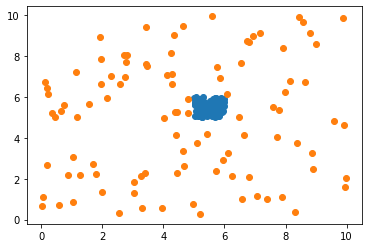

In [42]:
from numpy.random import uniform, choice, randint, rand
from math import sqrt

def pocatecni_polohy(pocet_castic, simulacni_krabice):
    stred_boxu = (simulacni_krabice[1]-simulacni_krabice[0])/2
    return np.array([[stred_boxu + rand() for _ in range(2)] for i in range(pocet_castic)])

def vykresli_castice(polohy, nazev_souboru):
    plt.scatter(polohy[:,0], polohy[:,1])
    plt.savefig(nazev_souboru)

def lennard_jones_potencial(vzdalenost, epsilon, sigma):
    return 4*epsilon*((sigma/vzdalenost)**12 - (sigma/vzdalenost)**6)

def vzdalenost_molekul(poloha_A, poloha_B):
    return sqrt((poloha_A[0]-poloha_B[0])**2 + (poloha_A[1]-poloha_B[1])**2)

def vylosuj_nahodnou_molekulu(molekuly):
    return randint(0, len(molekuly))

def vygeneruj_novou_polohu(simulacni_krabice):
    return np.array([uniform(simulacni_krabice[0], simulacni_krabice[1], size=2)])

def hamiltonian(molekuly, epsilon, sigma):
    H = 0
    for i_molekula in range(len(molekuly)):
        for j_molekula in range(i_molekula+1, len(molekuly)):
            molekula_A = (molekuly[i_molekula,0], molekuly[i_molekula,1])
            molekula_B = (molekuly[j_molekula,0], molekuly[j_molekula,1])
            vzdalenost = vzdalenost_molekul(molekula_A, molekula_B)
            H += lennard_jones_potencial(vzdalenost, epsilon, sigma)
    return H

def potencialni_energie_molekuly(i_molekula, molekuly, epsilon, sigma):
    potencialni_energie = 0
    for j_molekula in range(0, len(molekuly)):
        if i_molekula == j_molekula:
            continue
        molekula_A = (molekuly[i_molekula,0], molekuly[i_molekula,1])
        molekula_B = (molekuly[j_molekula,0], molekuly[j_molekula,1])
        vzdalenost = vzdalenost_molekul(molekula_A, molekula_B)
        potencialni_energie += lennard_jones_potencial(vzdalenost, epsilon, sigma)
    return potencialni_energie

def metropolis(molekuly, simulacni_krabice, beta, epsilon, sigma):
    vybrana_molekula = vylosuj_nahodnou_molekulu(molekuly)
    puvodni_poloha = molekuly[vybrana_molekula]
    energie_pred_zmenou = potencialni_energie_molekuly(vybrana_molekula, molekuly, epsilon, sigma)
    molekuly[vybrana_molekula] = vygeneruj_novou_polohu(simulacni_krabice)
    energie_po_zmene = potencialni_energie_molekuly(vybrana_molekula, molekuly, epsilon, sigma)
    zmena_energie = -(energie_po_zmene - energie_pred_zmenou)
    if zmena_energie > 0 and random() > np.exp(-beta*(zmena_energie)):
        molekuly[vybrana_molekula] = puvodni_poloha
    return zmena_energie

def monte_carlo(pocet_iteraci, energie, teplota, molekuly, simulacni_krabice, epsilon, sigma):
    for iterace in range(pocet_iteraci):
        zmena_energie = metropolis(molekuly, simulacni_krabice, beta=1.0/teplota, epsilon=epsilon, sigma=sigma)
        energie.append(energie[-1] + zmena_energie)

def main():
    epsilon, sigma, teplota = 1, 1, 1
    simulacni_krabice = (0, 10)
    pocet_castic = 100
    molekuly = pocatecni_polohy(pocet_castic, simulacni_krabice)
    vykresli_castice(molekuly, "molekuly_init.png")
    energie = [hamiltonian(molekuly, sigma, epsilon)]
    energie = monte_carlo(1000, energie, teplota, molekuly, simulacni_krabice, epsilon, sigma)
    vykresli_castice(molekuly, "molekuly_end.png")

if __name__ == "__main__":
    main()